[扑克手牌规则](https://en.wikipedia.org/wiki/List_of_poker_hands)
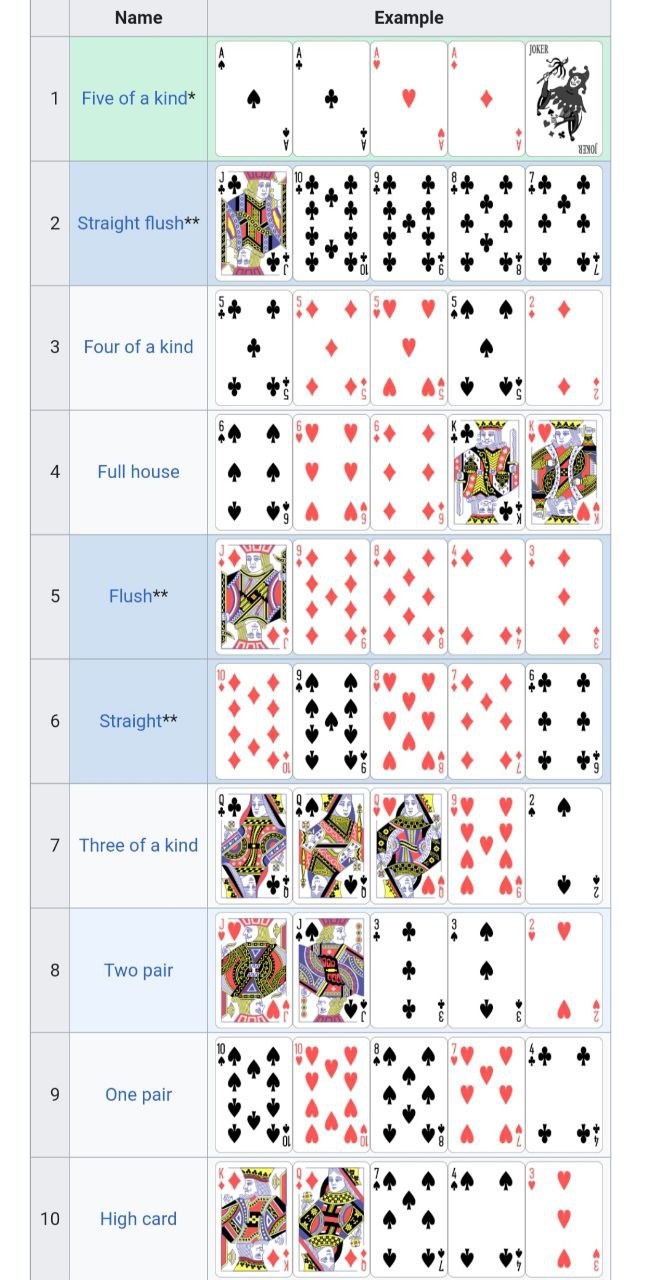

> 理解阶段，收集概念 概念清单
- 手牌（hand)
- cards(5张) 
- rank(大小）`A23456789TJQK`
- suit(花色)`CSHD`Clubs梅花, Spades黑桃, Hearts红心 Diamonds方块 
- poker(hands)->hand 输入一串手牌输出最大的手牌
- 什么是最大 需要游戏规则
- 牌型识别: 同花flus 顺子straight 重复数量(kind_n)
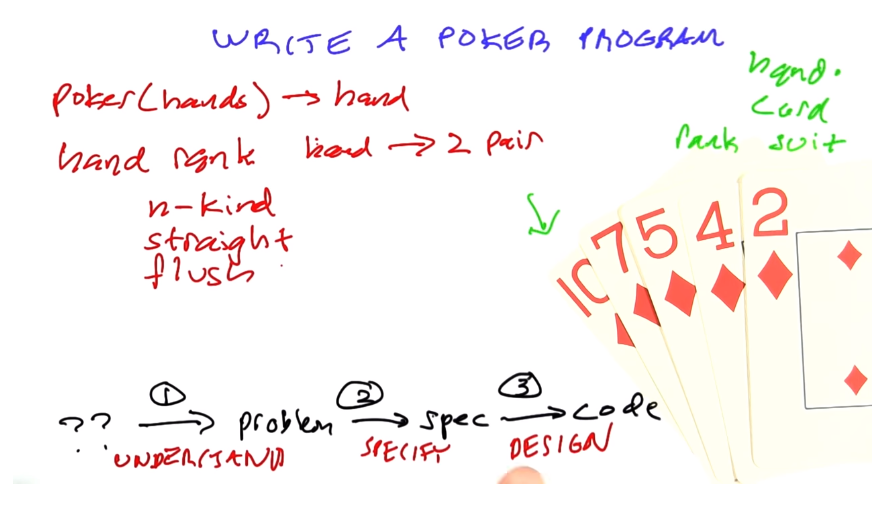

构建
- 排序规则
- 牌型识别 牌型相同时如何比大小
- 如何表示完全描述手牌

In [166]:
"""NOTE 序列比大小
assert 'help' > 'hello'
assert (1,2) < (2,)
assert (1,2) < (1,2,1)
""" 

def poker(hands):
    return max(hands,key=hand_rank)

def hand_rank(hand):
    ranks = card_ranks(hand)
    if straight(ranks) and flush(hand):            # straight flush
        return (8, max(ranks))
    elif kind(4, ranks):                           # 4 of a kind
        return (7, kind(4, ranks), kind(1, ranks))
    elif kind(3, ranks) and kind(2, ranks):        # full house
        return (6,kind(3,ranks),kind(2,ranks))
    elif flush(hand):                              # flush
        return (5,ranks)
    elif straight(ranks):                          # straight
        return (4,max(ranks))
    elif kind(3, ranks):                           # 3 of a kind
        return (3,kind(3,ranks),ranks)
    elif two_pair(ranks):                          # 2 pair
        return (2,two_pair(ranks),ranks)
    elif kind(2, ranks):                           # kind
        return (1,kind(2,ranks),ranks)
    else:                                          # high card
        return (0,ranks)

In [167]:
"""Note
字符串中字符位置已经是索引，没有使用字典
"""
def card_ranks(cards):
    # [5,5,9,9,6] -> [9, 9, 6, 5, 5]
    "Return a list of the ranks, sorted with higher first."  
    ranks = ['--23456789TJQKA'.index(r) for r, s in cards]
    return sorted(ranks,reverse = True)

In [168]:
def straight(ranks):
    "Return True if the ordered ranks form a 5-card straight."
    return max(ranks)-min(ranks)== 4 and len(set(ranks))==5
        

def flush(hand):
    "Return True if all the cards have the same suit."
    suits = [suit for _,suit in hand]
    return len(set(suits)) == 1

def test():
    sf = "6C 7C 8C 9C TC".split() # 同花顺
    fk = "9D 9H 9S 9C 7D".split() # 四个
    fh = "TD TC TH 7C 7D".split() # 葫芦
    assert card_ranks(sf)==[10,9,8,7,6]
    assert card_ranks(fk)==[9,9,9,9,7]
    assert card_ranks(fh)==[10,10,10,7,7]
    assert straight(card_ranks(sf)) == True
    assert straight(card_ranks(fk)) == False
    assert flush(sf) == True
    assert flush(fk) == False
    assert poker([sf,fk,fh]) == sf
    assert poker([fk,fh]) == fk
    assert poker([fh,fh]) == fh
    assert poker([fh]) == fh
    """ Note
     列表的运算符操作 
     2*[[1,2]] => [[1,2],[1,2]]
     2*[1,2] => [1,2,1,2]
    """
    assert poker([sf] + 2*[fh]) == sf
test()

In [77]:
def kind(n, ranks):
    """Return the first rank that this hand has exactly n of.
    Return None if there is no n-of-a-kind in the hand."""
    for r in ranks:
        if ranks.count(r) == n: return r 
    return None

def two_pair(ranks):
    """If there are two pair, return the two ranks as a
    tuple: (highest, lowest); otherwise return None."""
    pair = kind(2,ranks)
    lowpair = kind(2,list(reversed(ranks)))
    if pair and pair!=lowpair:
        return(pair,lowpair)
    else:
        return None
    
fk = "9D 9H 9S 9C 7D".split() # 四个
tp = '5S 5D 9D 9H 6S'.split()

fk_ranks = card_ranks(fk)
tp_ranks = card_ranks(tp)

assert kind(4, fk_ranks) == 9
assert kind(3, fk_ranks) == None
assert kind(2, fk_ranks) == None
assert kind(1, fk_ranks) == 7
assert two_pair(fk_ranks) == None
assert two_pair(tp_ranks) == (9,5)

#  规则补充
> 一个概念里的变化量 应当隔离修改限制在一个位置
## A，2，3，4，5 
- 按前面规则排序后[14,5,4,3,2]不是顺子
- 但它是顺子，且是最小顺子 [5,4,3,2,1]
- 修改 `Poker, hand_rank, card_rank 还是 straight`

## 两个人相同牌的情况
- 所有最大的成员 重写max为allmax

In [110]:
def card_ranks(cards):
    # [5,5,9,9,6] -> [9, 9, 6, 5, 5]
    "Return a list of the ranks, sorted with higher first."  
    ranks = ['--23456789TJQKA'.index(r) for r, s in cards]
    ranks = sorted(ranks,reverse = True)
    return [5,4,3,2,1] if ranks == [14,5,4,3,2] else ranks 

s1 = 'AS 2S 3S 4S 5S'.split()
assert card_ranks(s1) == [5,4,3,2,1]

In [132]:
def all_max(iterable,key=None):
    rst,max_val = [],None
    key = key or (lambda x:x)
    for x in iterable:
        val = key(x)
        if not rst or val > max_val:
            rst,max_val = [x],val
        elif val == max_val:
            rst.append(x)
    return rst

all_max([1,2,3,4,4])       

[4, 4]

In [263]:
def poker(hands):
    """
    return a list of winning hands:
    poker([hand,...])=>[hand,]
    """
    return all_max(hands,key=hand_rank)

In [288]:
# 发牌
import random
def deal(numhands, perhand_numcards=5, deck=[r + s for r in '23456789TJQKA' for s in 'CSHD']):
    deck = random.sample(deck, len(deck))
    return [
        [deck.pop() for j in range(perhand_numcards)] 
        for i in range(numhands)]

deal(2,3)

[['AH', '6S', '6C'], ['KH', 'TH', '7D']]

In [181]:
sf = "6C 7C 8C 9C TC".split() # 同花顺
fk = "9D 9H 9S 9C 7D".split() # 四个
fh = "TD TC TH 7C 7D".split() # 葫芦
assert poker([sf,fk,fh]) == [sf]
assert poker(2*[fh]) == [fh,fh]
assert poker([fh]) == [fh]

## 分析概率

In [248]:
def hand_precentages(n=700*1000):
    hand_names=[
        'no pair',
         'one pair',
         'two pair',
         'Three of a kind',
         'Straight',
         'Flush',
         'Full house',
         'Four of a kind',
         'Straight flush']
    counts = [0]*9
    for i in range(n//10):
        for hand in deal(10):
            ranking = hand_rank(hand)[0]
            counts[ranking] += 1
    for i in reversed(range(9)):
        print(f'{hand_names[i]:>20}: {100*counts[i]/n:>8.3f}%')

hand_precentages()

      Straight flush:    0.002%
      Four of a kind:    0.026%
          Full house:    0.146%
               Flush:    0.200%
            Straight:    0.363%
     Three of a kind:    2.126%
            two pair:    4.743%
            one pair:   42.300%
             no pair:   50.096%


## 重构
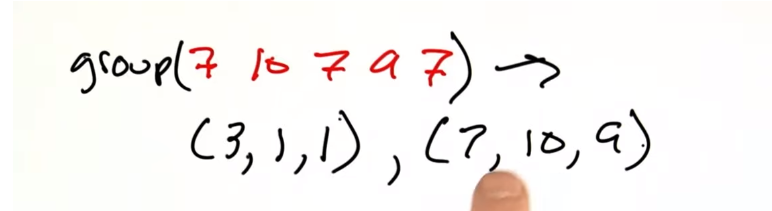

In [469]:
def group(hand):
    """
    Note:精辟
    """
    groups = [(hand.count(r),r) for r in set(hand)]
    return sorted(groups,reverse=True)

def hand_rank(hand):
    grous = group(['--23456789TJQKA'.index(r) for r,s in hand])
    counts,ranks = zip(*grous)
    if ranks == [14,5,4,3,2]:
        ranks = [5,4,3,2,1]
    
    straight = max(ranks)- min(ranks)== 4 and len(set(ranks))==5
    flush = len(set([suit for _,suit in hand])) == 1
    return (9 if (5,) == counts else
            8 if straight and flush else
            7 if (4,1) == counts else
            6 if (3,2) == counts else
            5 if flush else
            4 if straight else
            3 if (3,1,1) == counts else
            2 if (2,2,1) == counts else
            1 if (2,1,1,1) == counts else
            0),ranks

sf = "6C 7C 8C 9C TC".split() # 同花顺
fk = "9D 9H 9S 9C 7D".split() # 四个
fh = "TD TC TH 7C 7D".split() # 葫芦
assert poker([sf,fk,fh]) == [sf]
assert poker(2*[fh]) == [fh,fh]
assert poker([fh]) == [fh]

## 洗牌

In [353]:
import random
 
def swap(deck,i,j):
    deck[i],deck[j]=deck[j],deck[i]

        
def shuffle(deck):
    N=len(deck)
    for i in range(N-1):
        j = random.randrange(i,N)
        swap(deck,i,j)
        
# teacher's
def shuffle1(deck):
    N=len(deck)
    swapped = [False]*N
    while not all(swapped):
        i,j=random.randrange(N),random.randrange(N)
        swapped[i]=swapped[j]=True
        swap(deck,i,j)


def shuffle2(deck):
    N=len(deck)
    swapped = [False]*N
    while not all(swapped):
        i,j=random.randrange(N),random.randrange(N)
        swapped[i]=True
        swap(deck,i,j)

def shuffle3(deck):
    N = len(deck)
    for i in range(N):
        swap(deck,i,random.randrange(N))


# 测试
deck=list("abc")
shuffle2(deck)
deck

['b', 'c', 'a']

In [352]:
from collections import defaultdict
import math
def test_shuffler(shuffler,deck='abcd',n=10000):
    # 对于一种排列 P*总次数 = 排列的计数
    counts = defaultdict(int)
    for _ in range(n):
        input = list(deck)
        shuffler(input)
        counts[''.join(input)] +=1
    e = n/math.factorial(len(deck))
    ok = all((0.9<=v/e<=1.1) for v in counts.values())
    name = shuffler.__name__
    print('%s(%s)%s' % (name,deck,('ok' if ok else '*** BAD ***')))
    for item ,count in sorted(counts.items()):
        print("%s:%4.1f" % (item,count*100./n))

for deck in ["abc","ab"]:
    for f in [shuffle,shuffle1,shuffle2,shuffle3]:
        test_shuffler(f,deck)
    print('=============')

shuffle(abc)ok
abc:16.9
acb:17.1
bac:16.2
bca:16.7
cab:17.0
cba:16.0
shuffle1(abc)*** BAD ***
abc: 5.0
acb:14.1
bac:13.4
bca:26.2
cab:27.0
cba:14.2
shuffle2(abc)ok
abc:16.6
acb:16.6
bac:16.9
bca:16.7
cab:16.6
cba:16.5
shuffle3(abc)*** BAD ***
abc:14.0
acb:18.9
bac:18.6
bca:17.7
cab:15.4
cba:15.3
shuffle(ab)ok
ab:49.9
ba:50.1
shuffle1(ab)*** BAD ***
ab:16.8
ba:83.2
shuffle2(ab)ok
ab:50.4
ba:49.6
shuffle3(ab)ok
ab:50.0
ba:50.0


# 作业

In [471]:
# 7张牌里的最好牌
def best_hand(hand):
    hands = itertools.combinations(hand,r=5)
    # hands = itertools.permutations(hand,r=5)
    return max(hands,key=hand_rank)

assert (sorted(best_hand("6C 7C 8C 9C TC 5C JS".split()))
            == ['6C', '7C', '8C', '9C', 'TC'])
assert (sorted(best_hand("TD TC TH 7C 7D 8C 8S".split()))
            == ['8C', '8S', 'TC', 'TD', 'TH'])
assert (sorted(best_hand("JD TC TH 7C 7D 7S 7H".split()))
            == ['7C', '7D', '7H', '7S', 'JD'])

['8C', '8S', 'TC', 'TD', 'TH']


In [494]:
from pprint import pprint
# 加入小丑
# 红的替代任意方块红桃 ?R => (D or H)
# 黑的替代任意梅花黑桃 ?B => (S or C)
allranks = '23456789TJQKA'
blackcards = [r + s for r,s in itertools.product(allranks,'SC')]
redcards = [r + s for r,s in itertools.product(allranks,'DH')]

def replacements(card):
    if card == '?R':return redcards
    elif card == '?B':return blackcards
    else: return [card]
    
def best_wild_hand(hand):
    hands = [
        best_hand(h)       
        for h in itertools.product(
            *map(replacements,hand))]
    return max(set(hands),key=hand_rank)

assert (sorted(best_wild_hand("6C 7C 8C 9C TC 5C ?B".split()))
            == ['7C', '8C', '9C', 'JC', 'TC'])
assert (sorted(best_wild_hand("TD TC 5H 5C 7C ?R ?B".split()))
            == ['7C', 'TC', 'TD', 'TH', 'TS'])
assert (sorted(best_wild_hand("JD TC TH 7C 7D 7S 7H".split()))
            == ['7C', '7D', '7H', '7S', 'JD'])